### Μηχανική Μάθηση
#### 1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



Ονοματεπώνυμο φοιτητή: Φίλιππος Μαρντιροσιάν

Α.Μ.: el20034

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [76]:
import pandas as pd
import numpy as np
df = pd.read_csv('train-val.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [77]:
# 2a. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων
num_samples, num_features = df.shape
print(f"Πλήθος Δειγμάτων: {num_samples}")
print(f"Πλήθος Χαρακτηριστικών: {num_features}")

Πλήθος Δειγμάτων: 48423
Πλήθος Χαρακτηριστικών: 24


In [78]:
# 2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων
feature_types = df.dtypes
print("Είδος Χαρακτηριστικού:")
print(feature_types)

Είδος Χαρακτηριστικού:
id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object


In [79]:
# 2γ. τις ετικέτες των χαρακτηριστικών
feature_labels = df.columns
print("Ετικέτες Χαρακτηριστικών:")
print(feature_labels)

Ετικέτες Χαρακτηριστικών:
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [80]:
# 2δ. το πλήθος των κατηγοριών
category_counts = df.nunique() # ποσα unique στοιχεια υπάρχουν στην κάθε στήλη
print("Πλήθος Κατηγοριών ανά Χαρακτηριστικό:")
print(category_counts)


Πλήθος Κατηγοριών ανά Χαρακτηριστικό:
id               48423
Date              2534
Location            49
MinTemp            364
MaxTemp            456
Rainfall           443
Evaporation        231
Sunshine           140
WindGustDir         16
WindGustSpeed       61
WindDir9am          16
WindDir3pm          16
WindSpeed9am        40
WindSpeed3pm        42
Humidity9am        101
Humidity3pm        101
Pressure9am        508
Pressure3pm        497
Cloud9am            10
Cloud3pm             9
Temp9am            396
Temp3pm            452
RainToday            2
RainTomorrow         2
dtype: int64


In [81]:
# 2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία
# [πχ παρακατω κανω για το Location]
feature_name = 'Location'
category_sample_counts = df[feature_name].value_counts()
print(f"Πλήθος Δειγμάτων ανά Κατηγορία για το {feature_name}:")
print(category_sample_counts)


Πλήθος Δειγμάτων ανά Κατηγορία για το Location:
Location
Sydney              1145
Canberra            1136
Darwin              1107
Perth               1104
MelbourneAirport    1099
Brisbane            1098
Hobart              1096
Adelaide            1064
Sale                1054
MountGambier        1053
Mildura             1048
CoffsHarbour        1046
PerthAirport        1044
Woomera             1044
Bendigo             1042
Cobar               1038
Wollongong          1034
Cairns              1032
SalmonGums          1031
Townsville          1027
Portland            1022
Penrith             1021
Dartmoor            1021
Watsonia            1021
SydneyAirport       1017
Ballarat            1014
WaggaWagga          1013
Launceston          1011
Newcastle           1007
Witchcliffe         1004
AliceSprings        1004
Nuriootpa           1004
Albany               999
Tuggeranong          993
NorahHead            991
GoldCoast            987
Albury               985
Richmond          

In [7]:
# 2στ. Υπολογισμός του πίνακα συσχέτισης
correlation_matrix = df.corr(numeric_only = True) # numeric_only = True, because some values were strings
print("\nΣυσχέτιση μεταξύ Δεδομένων:")
print(correlation_matrix)



Συσχέτιση μεταξύ Δεδομένων:
                     id   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
id             1.000000  0.104771  0.136331 -0.024047     0.096221  0.078911   
MinTemp        0.104771  1.000000  0.715692  0.096510     0.457483  0.053477   
MaxTemp        0.136331  0.715692  1.000000 -0.103864     0.586798  0.469859   
Rainfall      -0.024047  0.096510 -0.103864  1.000000    -0.069284 -0.210261   
Evaporation    0.096221  0.457483  0.586798 -0.069284     1.000000  0.351482   
Sunshine       0.078911  0.053477  0.469859 -0.210261     0.351482  1.000000   
WindGustSpeed  0.047488  0.163349  0.013580  0.160382     0.194751 -0.051283   
WindSpeed9am   0.062482  0.193476  0.003229  0.102262     0.208774 -0.001514   
WindSpeed3pm   0.040819  0.183079  0.054409  0.068231     0.154487  0.055941   
Humidity9am   -0.129400 -0.232420 -0.485241  0.217506    -0.521304 -0.471021   
Humidity3pm   -0.085483  0.021193 -0.504320  0.258283    -0.392778 -0.634892   
Pressure9am

In [82]:
# 2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη
# Υπολογισμός αριθμού κενών τιμών ανά στήλη
missing_values = df.isnull().sum()

# Εμφάνιση αριθμού κενών τιμών ανά στήλη
print("Κενές Τιμές ανά Στήλη:")
print(missing_values)

Κενές Τιμές ανά Στήλη:
id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [83]:
df['Date'] = pd.to_datetime(df['Date']) # 'Date' to date-time format
df['Month'] = df['Date'].dt.month # change 'Date' to 'Month'
df.drop(['id','MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση με το RainTomorrow ειναι πολυ μικρη
df['AvgMaxTemp'] = df[['MaxTemp', 'Temp3pm']].mean(axis=1) # συνενωση το average των MaxTemp και Temp3pm
df.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # drop ta Temp3pm, MaxTemp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       48423 non-null  object 
 1   Rainfall       48423 non-null  float64
 2   Evaporation    28039 non-null  float64
 3   Sunshine       25426 non-null  float64
 4   WindGustDir    45302 non-null  object 
 5   WindGustSpeed  45330 non-null  float64
 6   WindDir9am     44602 non-null  object 
 7   WindDir3pm     47095 non-null  object 
 8   WindSpeed9am   48066 non-null  float64
 9   WindSpeed3pm   47566 non-null  float64
 10  Humidity9am    47865 non-null  float64
 11  Humidity3pm    47164 non-null  float64
 12  Pressure9am    43643 non-null  float64
 13  Pressure3pm    43634 non-null  float64
 14  Cloud9am       30533 non-null  float64
 15  Cloud3pm       29442 non-null  float64
 16  RainToday      48423 non-null  int64  
 17  RainTomorrow   48423 non-null  int64  
 18  Month 

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [84]:
# parakatw fainontai ta erwthmata 3β) ews 3στ) !!

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# handle numeric features
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday', 'RainTomorrow']) 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) # gemizw me Median 3.β) ii) απουσιάζουσες τιμές
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση

# handle categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) gemizw me most frequent sta objects ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)]
        , remainder='passthrough'  # Handle columns not specified in transformers (RainToday, RainTomorrow)
    )

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df) # 3.ε)

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
df_transformed_dense = pd.DataFrame(df_transformed.toarray(), columns=feature_names) # 3.ε)


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [148]:
# φαίνεται παραπάνω στο 3β)

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [149]:
# φαίνεται παραπάνω στο 3β)

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [150]:
# έχει ήδη γίνει στο 3β)

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [85]:
column_to_exclude = 'remainder__RainTomorrow'
y = df_transformed_dense[column_to_exclude]
X = df_transformed_dense.drop(columns=[column_to_exclude])
X.shape, y.shape # to check if the separation is done correctly

((48423, 112), (48423,))

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [86]:
from sklearn.model_selection import train_test_split

RAND_STATE = 42
  # Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [151]:
# Εκπαίδευση Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
print("\nNaive Bayes - FITTING DONE")

# Εκπαίδευση KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
print("\nKNeighborsClassifier - FITTING DONE")

# Εκπαίδευση Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
print("\nLogistic Regression - FITTING DONE")

# Εκπαίδευση MLP με ένα κρυφό επίπεδο
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1,))
mlp_classifier.fit(X_train, y_train)
print("\nMLP Classifier - FITTING DONE")

# Εκπαίδευση SVC
svc_classifier = LinearSVC(C=0.001, dual = "auto")
svc_classifier.fit(X_train, y_train)
print("\nSVC - FITTING DONE")

# Εκπαίδευση Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("\nDecision Tree - FITTING DONE")

# Εκπαίδευση Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print("\nRandom Forest - FITTING DONE")


Naive Bayes - FITTING DONE

KNeighborsClassifier - FITTING DONE

Logistic Regression - FITTING DONE

MLP Classifier - FITTING DONE

SVC - FITTING DONE

Decision Tree - FITTING DONE

Random Forest - FITTING DONE


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [89]:
y_pred_nb = nb_classifier.predict(X_test)
print("\nNB - predictions made")

y_pred_knn = knn_classifier.predict(X_test)
print("\nKNN - predictions made")

y_pred_lr = lr_classifier.predict(X_test)
print("\nLR - predictions made")

y_pred_mlp = mlp_classifier.predict(X_test)
print("\nMLP - predictions made")

y_pred_svc = svc_classifier.predict(X_test)
print("\nSVC - predictions made")

y_pred_dt = dt_classifier.predict(X_test)
print("\nDT - predictions made")

y_pred_rf = rf_classifier.predict(X_test)
print("\nRF - predictions made")


NB - predictions made

KNN - predictions made

LR - predictions made

MLP - predictions made

SVC - predictions made

DT - predictions made

RF - predictions made



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# Evaluate nb
print('\nNB SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_nb))
# Calculate F1 score for NB
f1_nb = f1_score(y_test, y_pred_nb, average='binary')
print(f'\nF1 Score for NB on validation set: {f1_nb:.4f}')
# Evaluate knn ########################################################################################################
print('\nKNN SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_knn))
# Calculate F1 score for KNeighborsClassifier
f1_knn = f1_score(y_test, y_pred_knn, average='binary')
print(f'\nF1 Score for KNeighborsClassifier on validation set: {f1_knn:.4f}')
# Evaluate lr ########################################################################################################
print('\nLR SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_lr))
# Calculate F1 score for LR
f1_lr = f1_score(y_test, y_pred_lr, average='binary')
print(f'\nF1 Score for LR on validation set: {f1_lr:.4f}')
# Evaluate mlp ########################################################################################################
print('\nMLP SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_mlp))
# Calculate F1 score for KNeighborsClassifier
f1_mlp = f1_score(y_test, y_pred_mlp, average='binary')
print(f'\nF1 Score for mlp on validation set: {f1_mlp:.4f}')
# Evaluate svc ########################################################################################################
print('\nSVC SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_svc))
# Calculate F1 score for KNeighborsClassifier
f1_svc = f1_score(y_test, y_pred_svc, average='binary')
print(f'\nF1 Score for svc on validation set: {f1_svc:.4f}')
# Evaluate dt ########################################################################################################
print('\nDT SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_dt))
# Calculate F1 score for KNeighborsClassifier
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
print(f'\nF1 Score for dt on validation set: {f1_dt:.4f}')
# Evaluate rf ########################################################################################################
print('\nRF SCORE:')

# compute the classification report
print(classification_report(y_test, y_pred_rf))
# Calculate F1 score for KNeighborsClassifier
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
print(f'\nF1 Score for rf on validation set: {f1_rf:.4f}')


NB SCORE:
              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73     11184
         1.0       0.36      0.71      0.48      3343

    accuracy                           0.64     14527
   macro avg       0.62      0.66      0.60     14527
weighted avg       0.76      0.64      0.67     14527


F1 Score for NB on validation set: 0.4753

KNN SCORE:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11184
         1.0       0.70      0.50      0.58      3343

    accuracy                           0.84     14527
   macro avg       0.78      0.72      0.74     14527
weighted avg       0.83      0.84      0.83     14527


F1 Score for KNeighborsClassifier on validation set: 0.5847

LR SCORE:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85 

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


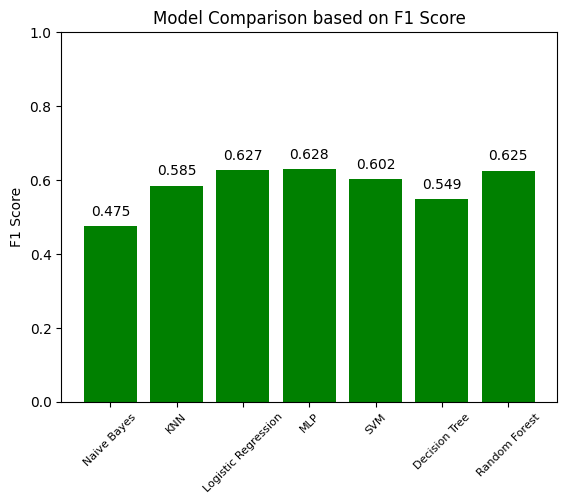

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1 scores for each model
f1_scores = {
    'Naive Bayes': f1_score(y_test, y_pred_nb, average='binary'),
    'KNN': f1_score(y_test, y_pred_knn, average='binary'),
    'Logistic Regression': f1_score(y_test, y_pred_lr, average='binary'),
    'MLP': f1_score(y_test, y_pred_mlp, average='binary'),
    'SVM': f1_score(y_test, y_pred_svc, average='binary'),
    'Decision Tree': f1_score(y_test, y_pred_dt, average='binary'),
    'Random Forest': f1_score(y_test, y_pred_rf, average='binary'),
}

# Create a bar plot
fig, ax = plt.subplots()
models = list(f1_scores.keys())
scores = list(f1_scores.values())

bars = ax.bar(models, scores, color='green')

# Add labels and title
ax.set_ylabel('F1 Score')
ax.set_title('Model Comparison based on F1 Score')
ax.set_ylim([0, 1])

# Add the F1 score values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Make X-axis labels smaller
ax.tick_params(axis='x', labelrotation=45, labelsize=8)

# Show the plot
plt.show()



### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [92]:
X_test2 = pd.read_csv('test.csv')

# morfopoihsh tou X_test2 wste na exei thn idia morfh me to X_test
X_test2['Date'] = pd.to_datetime(X_test2['Date'], dayfirst=False) # 'Date' to date-time format
X_test2['Month'] = X_test2['Date'].dt.month # change 'Date' to 'Month'
X_test2.drop(['MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση σε σχεση με το RainTomorrow ειναι πολυ μικρη
X_test2['AvgMaxTemp'] = X_test2[['MaxTemp', 'Temp3pm']].mean(axis=1) # κανω συνενωση το average των MaxTemp και Temp3pm
X_test2.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # σβηνω τα Temp3pm, MaxTemp, αρα μενει μονο το AvgMaxTemp

# handle numeric features
numeric_features = X_test2.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday']) ############df.select_dtypes(include=['number']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση

# handle categorical features
categorical_features = X_test2.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)]
        , remainder='passthrough'  # Handle columns not specified in transformers
    )

# Fit and transform the data
X_test2_transformed = preprocessor.fit_transform(X_test2) # 3.ε)

# Now, df_transformed contains the transformed data without the need for np.array conversion

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
X_test2_transformed_dense = pd.DataFrame(X_test2_transformed.toarray(), columns=feature_names) # 3.ε)

#y_test_pred_rf = rf_classifier.predict(X_test2_transformed_dense) #################################################### keep
print("\nPREPROCESSING DONE ON test.csv")


PREPROCESSING DONE ON test.csv


C:\Users\User\AppData\Local\Temp\ipykernel_18204\1892878706.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X_test2['Date'] = pd.to_datetime(X_test2['Date'], dayfirst=False) # 'Date' to date-time format


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [93]:
y_test_pred_rf = rf_classifier.predict(X_test2_transformed_dense)
print("\nRF - PREDICTIONS MADE")
# Create a new DataFrame 'ID' with the 'RainTomorrow' column
ID_df = pd.DataFrame({'id': range(1, len(y_test_pred_rf) + 1), 'RainTomorrow': y_test_pred_rf})

ID_df.info()

ID_df.to_csv('semi_final_output.csv',index=False)


RF - PREDICTIONS MADE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9699 non-null   int64  
 1   RainTomorrow  9699 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.7 KB


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [152]:
# Παρακάτω φαίνονται κάποια ενδεικτικά μικρότερα parameter grids. 
# Πιο κάτω φαίνονται αυτά που πραγματικά χρησιμοποίησα για να βγάλω τα ιδανικά αποτελέσματα

In [128]:
from sklearn.model_selection import GridSearchCV

# για NB

# Ορίστε τις υπερπαραμέτρους που θέλετε να αξιολογήσετε
param_grid = {
        'var_smoothing': [10,1,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
}

# Δημιουργία αντικειμένου GridSearchCV με διασταυρούμενη επικύρωση 5-fold
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1',verbose = 2,n_jobs = 4)

# Εκπαίδευση με διασταυρούμενη επικύρωση και αναζήτηση πλέγματος
grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))


Fitting 5 folds for each of 9 candidates, totalling 45 fits

BEST HYPERPARAMETERS:
 {'var_smoothing': 1}
Best F1 Score: 0.5323


In [ ]:
# Αποθήκευση των αποτελεσμάτων σε ένα CSV αρχείο
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('Naive_Bayes_results.csv', index=False)

In [129]:
# για KNN
from sklearn.model_selection import GridSearchCV

# Ορισμός των παραμέτρων που θα ελεγχθούν στο πλέγμα
param_grid = {'n_neighbors': [9, 20], 'weights': ['uniform', 'distance']}

# Δημιουργία του αντικειμένου GridSearchCV με scoring='f1'
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs = 4)

# Εκπαίδευση του GridSearchCV στα δεδομένα εκπαίδευσης
grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

BEST HYPERPARAMETERS:
 {'n_neighbors': 20, 'weights': 'distance'}
Best F1 Score: 0.5761


In [98]:
# για LR

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Ορισμός του πλέγματος παραμέτρων προς εξέταση
param_grid = {'C': [0.1, 1, 10]}

# Δημιουργία του αντικειμένου GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs = 4)

# Εκτέλεση της αναζήτησης πλέγματος στα δεδομένα εκπαίδευσης
#lr_classifier = LogisticRegression(max_iter=1e6)
grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

BEST HYPERPARAMETERS:
 {'C': 10}
Best F1 Score: 0.6145


In [125]:
# για MLP

# Ορίστε το εύρος των υπερπαραμέτρων που θα ελεγχθούν
param_grid = {
    'hidden_layer_sizes': [(35,),(40,)],  
    'activation': ['relu', 'tanh'],  
    'alpha': [0.1, 0.05],   
    'learning_rate': ['constant', 'adaptive'],  
}

# Δημιουργία του GridSearchCV με τον MLPClassifier και το πλέγμα παραμέτρων
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs = 4)

# Εκπαίδευση του GridSearchCV στα δεδομένα
grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits

BEST HYPERPARAMETERS:
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant'}
Best F1 Score: 0.6414


In [52]:
# Αποθήκευση των αποτελεσμάτων σε ένα CSV αρχείο
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('MLP_results.csv', index=False)

In [59]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Ορίζουμε το πλέγμα των υπερπαραμέτρων που θα αξιολογήσουμε
param_grid = {'C': [0.001, 0.01, 0.1]}  # Tolerance for stopping criteria

# Δημιουργούμε ένα αντικείμενο GridSearchCV
grid_search = GridSearchCV(LinearSVC(dual="auto"), param_grid, cv=5, scoring='f1', verbose=2, n_jobs=4)

# Εκπαίδευση με διασταυρούμενη επικύρωση
grid_search.fit(X_train, y_train) # is this the best (?)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

BEST HYPERPARAMETERS:
 {'C': 0.1}
Best F1 Score: 0.6067


In [55]:
# Αποθήκευση των αποτελεσμάτων σε ένα CSV αρχείο
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('LinearSVC_results.csv', index=False)

In [30]:
# για το Decision Tree
# (Κάνει πολυ χρόνο, για αυτό το έχω κάνει comment, παρακάτω φαίνονται τα αποτελέσματα, τα οποία επίσης δεν είναι ικανοποιητικά)
# Ορισμός των υπερπαραμέτρων που θέλουμε να εξετάσουμε
#param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'splitter': ['best', 'random'],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2]
#}

# Δημιουργία του αντικειμένου GridSearchCV
#grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs = 4)

# Εκπαίδευση με διασταυρούμενη επικύρωση
#grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
#print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
#print("Best F1 Score: {:.4f}".format(grid_search.best_score_))


Fitting 5 folds for each of 64 candidates, totalling 320 fits

BEST HYPERPARAMETERS:
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best F1 Score: 0.5812


In [31]:
# Αποθήκευση των αποτελεσμάτων σε ένα CSV αρχείο
#results_df = pd.DataFrame(grid_search.cv_results_)
#results_df.to_csv('DT_results.csv', index=False)

In [32]:
# για το Random Forest
from sklearn.metrics import make_scorer, f1_score
# το εύρος των υπερπαραμέτρων
param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Δημιουργία του GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs = 4)

# Εκπαίδευση με διασταυρούμενη επικύρωση
grid_search.fit(X_train, y_train)

# Εκτύπωση των βέλτιστων υπερπαραμέτρων
print("\nBEST HYPERPARAMETERS:\n", grid_search.best_params_)

# Εκτύπωση της βέλτιστης F1 score
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits

BEST HYPERPARAMETERS:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.6119


In [33]:
# Αποθήκευση των αποτελεσμάτων σε ένα CSV αρχείο
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('RF_results.csv', index=False)

In [ ]:
# Παρακάτω φαίνονται κάποια μεγαλύτερα parameter grids:

# NB
#param_grid = {
#       'var_smoothing': [10,1,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
#}

# KNN
#param_grid = {
 #                'n_neighbors': [5,8,10,15,20,30,50],
 #                'metric':['euclidean','manhattan']
#}

# LR
#param_grid =  {
#    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
 #   'C' : np.logspace(-4, 4, 20),
 #   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
 #   'max_iter' : [100, 1000,2500, 5000]
 #   }

# MLP
#param_grid = {
 #   'hidden_layer_sizes': [(10,30,10),(20,)],
 #   'activation': ['tanh', 'relu'],
 #   'solver': ['sgd', 'adam'],
 #   'alpha': [0.0001, 0.05],
 #   'learning_rate': ['constant','adaptive'],
#}

# SVC
#param_grid = {
 #            'C': [1, 10, 100, 400, 1000]   
#}

# DT
#param_grid = {
 #   'splitter': ['best', 'random'],
 #   'criterion': ['gini', 'entropy'],
 #   'max_features': ['log2', 'sqrt', 'auto'],
 #   'max_depth': [5, 10, 15, 20],  # Increase the range
 #   'min_samples_split': [5, 10, 15, 20],  # Increase the range
 #   'min_samples_leaf': [5, 10, 15, 20],  # Increase the range
 #   'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 42, 100]  # More random states
#}

# RF
#grid = {
 #   'n_estimators': [100,200,300,400,500], 
 #   'max_features': ['sqrt', 'log2'],
 #   'max_depth' : [None,4,5,6,7,8],
 #   'criterion' :['gini', 'entropy'],
 #   'random_state' : [18]
#}

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [146]:
# NB
from sklearn.metrics import classification_report

best_nb_classifier = GaussianNB(var_smoothing=1) # ο ιδανικος NB
best_nb_classifier.fit(X_train, y_train) 
print("\nnb Classifier - FITTING DONE")

y_pred_nb = best_nb_classifier.predict(X_test)
print("\nnb - PREDICTIONS MADE")

# Evaluate mlp ########################################################################################################
print('\nnb - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_nb))


nb Classifier - FITTING DONE

nb - PREDICTIONS MADE

nb - SCORE

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     11184
         1.0       0.69      0.44      0.54      3343

    accuracy                           0.83     14527
   macro avg       0.77      0.69      0.72     14527
weighted avg       0.81      0.83      0.81     14527



In [35]:
# KNN
from sklearn.metrics import classification_report

best_knn_classifier = KNeighborsClassifier(n_neighbors = 20, weights = 'distance') # ο ιδανικος KNN
best_knn_classifier.fit(X_train, y_train)
print("\nknn Classifier - FITTING DONE")

y_pred_knn = best_knn_classifier.predict(X_test)
print("\nknn - PREDICTIONS MADE")

# Evaluate knn ########################################################################################################
print('\nknn - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_knn))


knn Classifier - FITTING DONE

knn - PREDICTIONS MADE

knn - SCORE

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     11184
         1.0       0.76      0.48      0.59      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.72      0.75     14527
weighted avg       0.84      0.85      0.83     14527



In [142]:
# LR
from sklearn.metrics import classification_report

best_lr_classifier = LogisticRegression(C=1000) # ο ιδανικος LR
best_lr_classifier.fit(X_train, y_train)
print("\nlr Classifier - FITTING DONE")

y_pred_lr = best_lr_classifier.predict(X_test)
print("\nlr - PREDICTIONS MADE")

# Evaluate lr ########################################################################################################
print('\nlr - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_lr))


lr Classifier - FITTING DONE

lr - PREDICTIONS MADE

lr - SCORE

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.77     14527
weighted avg       0.84      0.85      0.84     14527



In [122]:
from sklearn.metrics import classification_report

# MLP
best_mlp_classifier = MLPClassifier(activation = 'tanh', alpha = 0.1, hidden_layer_sizes = (40,), learning_rate = 'adaptive', random_state=42) # ο ιδανικος MLP
best_mlp_classifier.fit(X_train, y_train)
print("\nMLP Classifier - FITTING DONE")

y_pred_mlp = best_mlp_classifier.predict(X_test)
print("\nMLP - PREDICTIONS MADE")

# Evaluate mlp ########################################################################################################
print('\nMLP - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_mlp))

f1_mlp = f1_score(y_test, y_pred_mlp, average='binary')
print(f'\nF1 Score for mlp on validation set: {f1_mlp:.4f}')


MLP Classifier - FITTING DONE

MLP - PREDICTIONS MADE

MLP - SCORE

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     11184
         1.0       0.74      0.61      0.67      3343

    accuracy                           0.86     14527
   macro avg       0.82      0.77      0.79     14527
weighted avg       0.86      0.86      0.86     14527


F1 Score for mlp on validation set: 0.6716


In [38]:
# LinearSVC
from sklearn.metrics import classification_report

best_svc_classifier = LinearSVC(C = 0.01) # ο ιδανικος SVC
best_svc_classifier.fit(X_train, y_train)
print("\nsvc Classifier - FITTING DONE")

y_pred_svc = best_svc_classifier.predict(X_test)
print("\nsvc - PREDICTIONS MADE")

# Evaluate svc ########################################################################################################
print('\nsvc - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_svc))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



svc Classifier - FITTING DONE

svc - PREDICTIONS MADE

svc - SCORE

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.76      0.52      0.62      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.76     14527
weighted avg       0.84      0.85      0.84     14527



In [130]:
# DT
from sklearn.metrics import classification_report

best_dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best') # ο ιδανικος DT
best_dt_classifier.fit(X_train, y_train)
print("\ndt Classifier - FITTING DONE")

y_pred_dt = best_dt_classifier.predict(X_test)
print("\ndt - PREDICTIONS MADE")

# Evaluate dt ########################################################################################################
print('\ndt - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_dt))


dt Classifier - FITTING DONE

dt - PREDICTIONS MADE

dt - SCORE

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     11184
         1.0       0.68      0.52      0.59      3343

    accuracy                           0.83     14527
   macro avg       0.78      0.72      0.74     14527
weighted avg       0.82      0.83      0.83     14527



In [143]:
# RF
from sklearn.metrics import classification_report

best_rf_classifier = RandomForestClassifier(max_depth = 30, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200) # ο ιδανικος RF
best_rf_classifier.fit(X_train, y_train)
print("\nrf Classifier - FITTING DONE")

y_pred_rf = best_rf_classifier.predict(X_test)
print("\nrf - PREDICTIONS MADE")

# Evaluate rf ########################################################################################################
print('\nrf - SCORE\n')

# compute the classification report
print(classification_report(y_test, y_pred_rf))


rf Classifier - FITTING DONE

rf - PREDICTIONS MADE

rf - SCORE

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     11184
         1.0       0.79      0.53      0.63      3343

    accuracy                           0.86     14527
   macro avg       0.83      0.74      0.77     14527
weighted avg       0.85      0.86      0.85     14527




6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [120]:
# Έχει γίνει παραπάνω μαζί με το predict !

6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


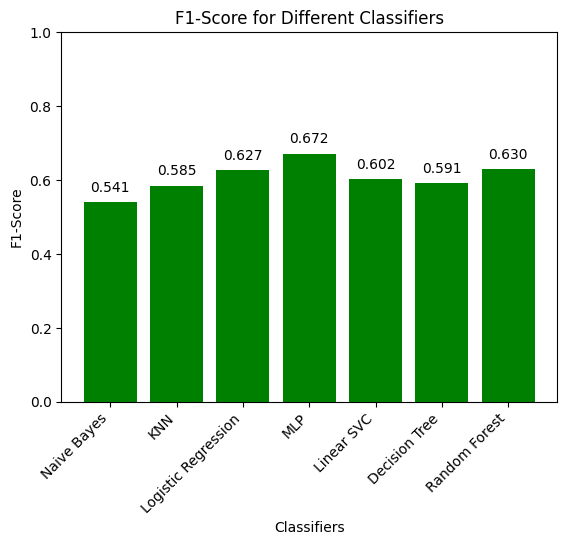

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Define the classifiers and their predictions
classifiers = ['Naive Bayes', 'KNN', 'Logistic Regression', 'MLP', 'Linear SVC', 'Decision Tree', 'Random Forest']
predictions = [y_pred_nb, y_pred_knn, y_pred_lr, y_pred_mlp, y_pred_svc, y_pred_dt, y_pred_rf]

# Calculate F1-score for each classifier
f1_scores = [f1_score(y_test, y_pred) for y_pred in predictions]

# Create a bar plot with smaller font size on the x-axis
plt.bar(classifiers, f1_scores, color='green')
plt.xlabel('Classifiers', fontsize=10)  # Set the fontsize to your desired value
plt.ylabel('F1-Score')
plt.title('F1-Score for Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Display F1-score values above the bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', va='bottom')
plt.show()


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [127]:
from sklearn.impute import KNNImputer
X_test2 = pd.read_csv('test.csv')

# morfopoihsh tou X_test2 wste na exei thn idia morfh me to X_test
X_test2['Date'] = pd.to_datetime(X_test2['Date'], dayfirst=False) # 'Date' to date-time format
X_test2['Month'] = X_test2['Date'].dt.month # change 'Date' to 'Month'
X_test2.drop(['MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση σε σχεση με το RainTomorrow ειναι πολυ μικρη
X_test2['AvgMaxTemp'] = X_test2[['MaxTemp', 'Temp3pm']].mean(axis=1) # κανω συνενωση το average των MaxTemp και Temp3pm
X_test2.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # σβηνω τα Temp3pm, MaxTemp, αρα μενει μονο το AvgMaxTemp

# handle numeric features
numeric_features = X_test2.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday']) ############df.select_dtypes(include=['number']).columns
#num_feat_to_be_transformed = df.loc[:, ~df.columns.isin(['RainToday', 'RainTomorrow'])]
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer())
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση

# handle categorical features
categorical_features = X_test2.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)
    transformers=[
        ('num', numeric_transformer, numeric_features), ###################################
        ('cat', categorical_transformer, categorical_features)]
        , remainder='passthrough'  # Handle columns not specified in transformers
    )

# Fit and transform the data
X_test2_transformed = preprocessor.fit_transform(X_test2) # 3.ε)

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
X_test2_transformed_dense = pd.DataFrame(X_test2_transformed.toarray(), columns=feature_names) # 3.ε)

#y_test_pred_rf = rf_classifier.predict(X_test2_transformed_dense) #################################################### keep
print("\nPREPROCESSING DONE ON test.csv")

# do the predictions on X_test2_transformed_dense using the best classifier
y_test_pred_mlp = best_mlp_classifier.predict(X_test2_transformed_dense)
print("\nPREDICTIONS MADE ON test.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_18204\1934392551.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X_test2['Date'] = pd.to_datetime(X_test2['Date'], dayfirst=False) # 'Date' to date-time format



PREPROCESSING DONE ON test.csv

PREDICTIONS MADE ON test.csv


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [126]:
# Kaggle Score: 0.65123 (Position: 16/147)

# 7β) Create a new DataFrame 'ID' with the 'RainTomorrow' column
ID_df = pd.DataFrame({'id': range(1, len(y_test_pred_mlp) + 1), 'RainTomorrow': y_test_pred_mlp})

ID_df.info()

ID_df.to_csv('final_predictions_best_mlp.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9699 non-null   int64  
 1   RainTomorrow  9699 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.7 KB
